Problem tanımı ve amaç: Bu veri seti ilk kez 2012 yılında yayınlanan 155 ülkeyi mutluluk seviyelerine göre sıralayan dünya mutluluk raporlarından oluşmaktadır.

Mutluluk seviyelerini belirlemek için 6 faktör -ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik - göz önüne alınmaktadır. Amaç günümüz dünyasında daha mutlu toplumlar oluşmasına katkı sağlamak için aşağıdaki gibi sorulara cevaplar arayabilmektir.

Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?


Veri Seti Link: https://www.kaggle.com/unsdsn/world-happiness

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

Veri setini yükleyip, birleştirelim ve inceleyelim.
2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti? Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı? sorusu zerinde durmak istiyorum o yüzden veri setlerini ayrı ayrı inceleyeceğim:



In [2]:
data1 = pd.read_csv("2015.csv")
data2 = pd.read_csv("2016.csv")
data3 = pd.read_csv("2017.csv")
data4 = pd.read_csv("2018.csv")
data5 = pd.read_csv("2019.csv")

In [58]:
data_1 = pd.concat([data1,data2])
data_1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404,3.564
153,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.288,3.432
154,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192,3.414
155,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2.936,3.202


In [59]:
data_2 = pd.concat([data2,data3])
data_2

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Generosity,Dystopia Residual,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.163740,0.79504,0.579410,...,0.361710,2.73939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.145240,0.86303,0.585570,...,0.280830,2.69463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.183260,0.86733,0.566240,...,0.476780,2.83137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.126900,0.79579,0.596090,...,0.378950,2.66465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.134640,0.81091,0.571040,...,0.254920,2.82596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,0.945707,NaN,0.581844,...,0.252756,NaN,151.0,3.471,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,NaN,NaN,NaN,NaN,0.396103,NaN,0.081539,...,0.493664,NaN,152.0,3.462,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,1.041990,NaN,0.390018,...,0.354256,NaN,153.0,3.349,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,0.629794,NaN,0.059901,...,0.204435,NaN,154.0,2.905,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


Verisetlerini inceleyelim:

In [20]:
x = data_1.shape
y = data_2.shape
print(x,)

(315, 14) (312, 21)


In [22]:
x = data_1.info()
y = data_2.info()
print(x,y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        315 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    int64  
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         315 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        315 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     315 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Lower Confidence Interval      157 non-null    flo

İçinde ülkeler için arama yapabiliriz örneğin Türkiye için yapalım:

In [23]:
data = pd.concat([data1,data2,data3])

In [24]:
sonuclar = data[data['Country'] == 'Turkey']
sonuclar

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
75,Turkey,Middle East and Northern Africa,76.0,5.332,0.03864,1.06098,0.946320,0.73172,0.228150,0.15746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,Turkey,Middle East and Northern Africa,78.0,5.389,NaN,1.16492,0.877170,0.64718,0.238890,0.12348,...,5.295,5.483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Turkey,NaN,NaN,NaN,NaN,NaN,1.337753,NaN,0.300741,NaN,...,NaN,NaN,69.0,5.5,5.594865,5.405135,1.198274,0.637606,0.099672,1.879278


Ülkelerin mutluluk değişiminin üstündeki etkiyi belirlemeye çalışalım:

# **Economy (GDP per Capita):**

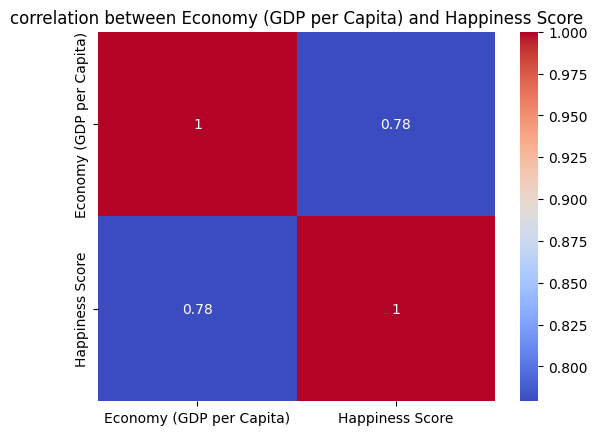

In [42]:
korelasyon_matrisi = data_1[['Economy (GDP per Capita)', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Economy (GDP per Capita) and Happiness Score')
plt.show()

2015-2016 yılları için Mutluluk skoru ve ekonomi (Kişi başına GSYİH) arasında güçlü bir pozitif  korelasyon (0.78) tespit edilmiştir. Bu kişi başına GSYİH mutluluk skoru üzerindeki etkisinin yüksek olduğunu kanıtlar.

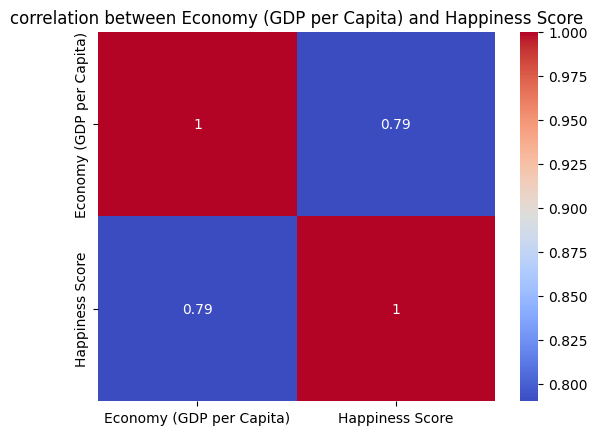

In [43]:
korelasyon_matrisi = data_2[['Economy (GDP per Capita)', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Economy (GDP per Capita) and Happiness Score')
plt.show()

2016-2017 yılları içinde aynı yorumu yapabiliriz.

# **Health (Life Expectancy):**




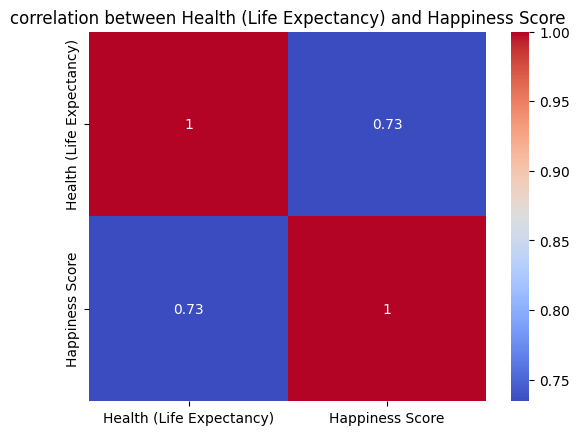

In [44]:
korelasyon_matrisi = data_1[['Health (Life Expectancy)', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Health (Life Expectancy) and Happiness Score')
plt.show()

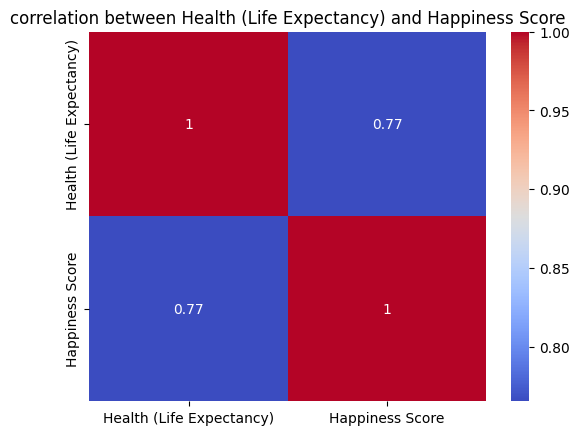

In [46]:
korelasyon_matrisi = data_2[['Health (Life Expectancy)', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Health (Life Expectancy) and Happiness Score')
plt.show()

Sağlık (Yaşam Beklentisi) içinde ekonomi ile aynı yorumu yapabilirim ve 2015-2016, 2016-2017 yılları arasında pek bir fark yok.

# **Freedom**

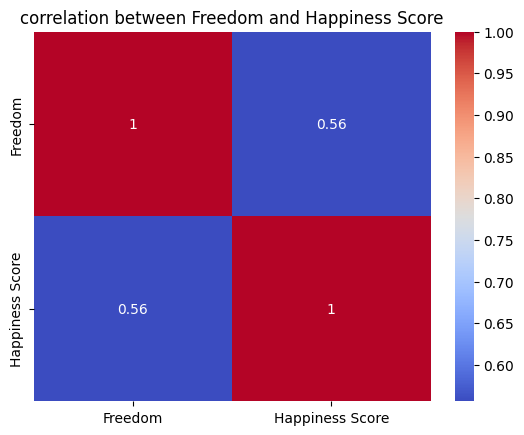

In [47]:
korelasyon_matrisi = data_1[['Freedom', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Freedom and Happiness Score')
plt.show()

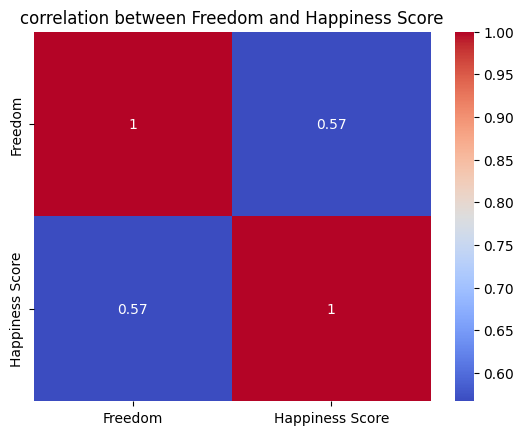

In [48]:
korelasyon_matrisi = data_2[['Freedom', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Freedom and Happiness Score')
plt.show()

Özgürlük ve mutluluk skoru arasında orta derecede pozitif korelasyon (056, 0,57) vardır. Özgürlük ve mutluluk skoru değişkenleri arasındaki bağlantı, istatistiksel olarak anlamlıdır, ancak çok güçlü değildir.

# **Trust (Government Corruption):**

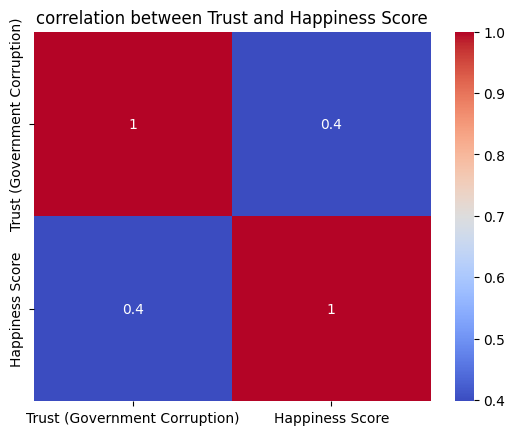

In [52]:
korelasyon_matrisi = data_1[['Trust (Government Corruption)', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Trust and Happiness Score')
plt.show()


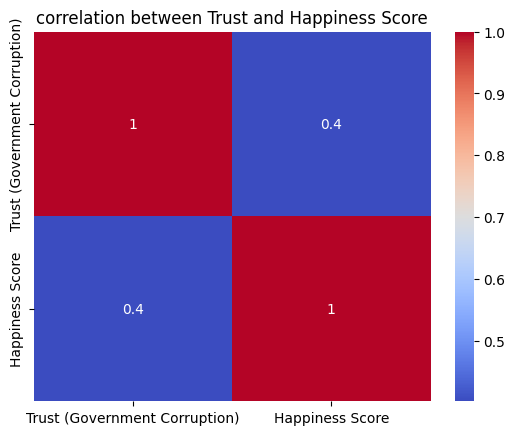

In [50]:
korelasyon_matrisi = data_2[['Trust (Government Corruption)', 'Happiness Score']].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('correlation between Trust and Happiness Score')
plt.show()


Güven ve mutluluk skoru arasında orta derecede pozitif korelasyon(0,4) vardır.

# **Region**

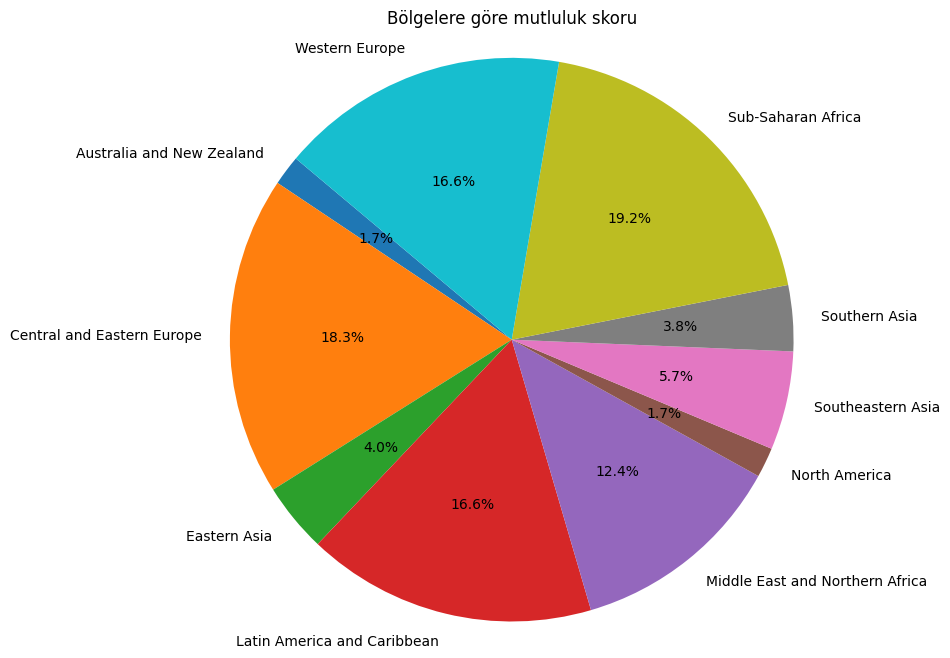

In [54]:
grup = data_1.groupby('Region')[['Happiness Score']].sum()

# Pasta grafiğini oluşturalım
plt.figure(figsize=(8, 8))
plt.pie(grup['Happiness Score'], labels=grup.index, autopct='%1.1f%%', startangle=140)
plt.title('Bölgelere göre mutluluk skoru')
plt.axis('equal')
plt.show()

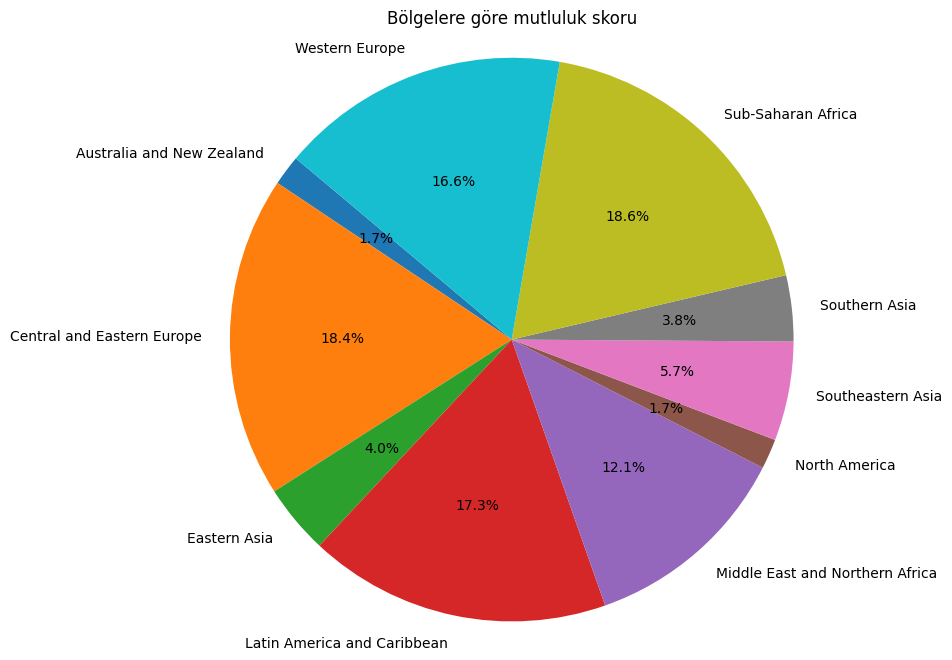

In [55]:
grup = data_2.groupby('Region')[['Happiness Score']].sum()

# Pasta grafiğini oluşturalım
plt.figure(figsize=(8, 8))
plt.pie(grup['Happiness Score'], labels=grup.index, autopct='%1.1f%%', startangle=140)
plt.title('Bölgelere göre mutluluk skoru')
plt.axis('equal')
plt.show()

2015-2016 ve 2016-2017 yılları arasında yıllar geçtikçe Latin Amerika ve Karaipler de mutluluk oranının arttığını bunun aksine Sahra-altı Afrika da azaldığını görüyoruz. Genel bir bakarsak mutluluk skorunun en üksek olduğu bölgenin Sahra-altı Afrika olduğunu ve onu Merkez ve Doğu Avrupa, Latin Amerika ve Karaiplerin takip ettiğini görüyoruz.

# **Genel Yorum:**

2015-2016 ve 2016-2017 yılları arasında çok da anlamlı bir mutluluk skoru farkı olmadığını sıralamada ilk 10 daki ülkelerin yer değiştirerek yine sırasını koruduğunu ve ekonomi, özgürlük, sağlık gibi etkenlerin aynı oranda olmasa da yüksek ve orta derecede mutluluk üzerinde etkisinin olduğunu ilk ve son sıradaki ülkelere bakarak söyleyebilirim. Yaşadığımız bölge, ekonomik durumumuz, sağlık ve özgürlük, genel mutluluğumuzu etkileyen önemli faktörlerdir. Bölge, sosyal bağlantılarımızı ve yaşam standartlarımızı şekillendirebilir. İyi bir ekonomik durum, temel ihtiyaçlarımızı karşılamada yardımcı olabilirken, iyi bir sağlık durumu ve özgürlük hissi, yaşam kalitemizi artırabilir. Ancak mutluluk, yalnızca bu faktörlerin bir bileşimi değil, aynı zamanda kişisel tutum, ilişkiler, iç huzur ve kişisel değerlerimizle de şekillenir. Her birey için mutluluk kaynakları farklı olabilir ve bu faktörlerin bir dengesi, yaşamın tatmin edici ve mutlu bir şekilde deneyimlenmesini sağlar.